In [ ]:
!pip install opencv-contrib-python==4.4.0.44

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 55.7 MB 1.3 MB/s 
  Attempting uninstall: opencv-contrib-python
    Found existing installation: opencv-contrib-python 4.1.2.30
    Uninstalling opencv-contrib-python-4.1.2.30:
      Successfully uninstalled opencv-contrib-python-4.1.2.30


In [ ]:
# importing the libraries
import cv2 as cv
import math
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

import imageio
cv.ocl.setUseOpenCL(False)
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# reading the given image as input
img = cv.imread('line_ransac.png')
img_gray = cv.cvtColor(img, cv.COLOR_BGR2GRAY)

# using sift descriptor to identify the input points as keypoints
sift = cv.SIFT_create()
keypoints, desc = sift.detectAndCompute(img_gray, None)

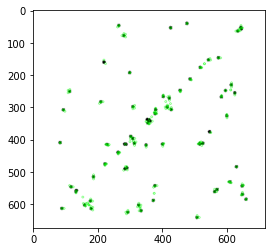

In [ ]:
# drawing the keypoints to verify
img_draw = cv.drawKeypoints(img_gray, keypoints, None, color=(0,255,0))
plt.imshow(img_draw)

In [ ]:
# printing the coordinates of the keypoints / input points to verify
co = 0
for keys in keypoints:
  x_print, y_print = keys.pt
  co +=1
  print(x_print, y_print)

print(co)

83.40026092529297 409.120849609375
83.40026092529297 409.120849609375
83.40026092529297 409.120849609375
83.40026092529297 409.120849609375
83.40026092529297 409.120849609375
83.40026092529297 409.120849609375
83.40026092529297 409.120849609375
89.04146575927734 612.163330078125
89.04146575927734 612.163330078125
89.04146575927734 612.163330078125
89.04146575927734 612.163330078125
93.5454330444336 307.9379577636719
93.5454330444336 307.9379577636719
93.5454330444336 307.9379577636719
93.5454330444336 307.9379577636719
93.5454330444336 307.9379577636719
93.5454330444336 307.9379577636719
95.44376373291016 612.1246337890625
98.01866149902344 312.2110290527344
107.90508270263672 255.0643768310547
107.94760131835938 247.36831665039062
112.45730590820312 541.3602905273438
112.69120025634766 251.15664672851562
112.69120025634766 251.15664672851562
112.69120025634766 251.15664672851562
112.69120025634766 251.15664672851562
112.69120025634766 251.15664672851562
112.69120025634766 251.15664672

298.8028564453125 405.7900390625
409.2764587402344 282.1233825683594


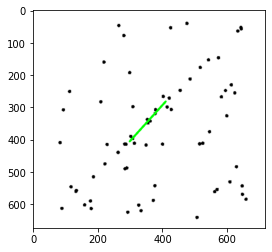

In [ ]:
# Actual code.

# Used the algorithm of RANSAC to check for 2 points at a time and compute the distances of other points on the plane. If the d < 50 (threshold), it is an inlier.
# Finally the line with the highest number of inliers gets plotted.

# variable to store the maximum number of inliers.
count_final = 0

# using nested for loops to iterate over possible 2 points combinations on the plane and check for inliers.
for key in keypoints:
  x1, y1 = key.pt
  for key1 in keypoints:
    x2, y2 = key1.pt

    # condition to check for infinite slope.
    if x2!=x1:
      m = (y2-y1)/(x2-x1) # slope
      c = y1 - (m * x1)   # intercept
      count = 0
      for key2 in keypoints:
        x, y = key2.pt
        d = abs((m*x - y + c))/((m**2 + 1)**0.5)  # distance of points from the line
        if d<50:
          count = count + 1
      if count > count_final: # check for maximum number of inliers
        count_final = count
        x1_final = x1
        y1_final = y1
        x2_final = x2
        y2_final = y2
        m_final = m
        c_final = c

# drawing the best fit line obtained
line_fit = cv.line(img, (int(x1_final), int(y1_final)), (int(x2_final), int(y2_final)), (0,255,0), thickness = 5)

print(x1_final, y1_final)
print(x2_final, y2_final)

plt.imshow(line_fit, cmap = 'gray')

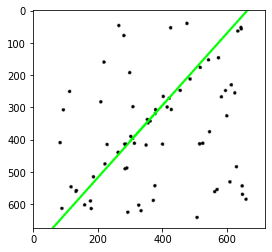

In [ ]:
# calculating coordinates from the obtained best fit line to extrapolate it
y1_plot = c_final
y2_plot = (m_final * img.shape[1]) + c_final

# plotting the final extrapolated point.
result = cv.line(img, (int(0), int(y1_plot)), (int(img.shape[1]), int(y2_plot)), (0,255,0), thickness = 5)
plt.imshow(result, cmap='gray')